In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
app=pd.read_csv('/content/application_data.csv')

In [ ]:
app.shape

(23282, 122)

In [ ]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
##Feature selection

In [ ]:
app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [ ]:
missing_info=pd.DataFrame(app.isnull().sum().sort_values(ascending=False)/len(app)).reset_index()
missing_info.rename(columns={'index':'colname',0:'null_count'},inplace=True)
missing_info.to_excel(r"C:\Users\Dell\Downloads\archive (18)\missing_info.xlsx",index=False)

In [ ]:
missing_col=missing_info[missing_info['null_count']>=0.4]['colname'].to_list()

In [ ]:
app_rem=app.drop(columns=missing_col,axis=1)

In [ ]:
app_rem.shape

(23282, 73)

In [ ]:
app_rem.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [ ]:
flag_cols=[]

for col in app_rem.columns:
  if col.startswith("FLAG_"):
    flag_cols.append(col)
  else:
    pass

In [ ]:
len(flag_cols)

28

In [ ]:
app_rem[flag_cols]

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,N,Y,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,N,N,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Y,Y,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,N,Y,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,N,Y,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23277,N,Y,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23278,N,N,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23279,N,N,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23280,N,Y,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
flag_target=app_rem[flag_cols+['TARGET']]

In [ ]:
flag_target.head(10)

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,N,Y,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,N,N,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,Y,Y,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,N,Y,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,N,Y,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,N,Y,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,Y,Y,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,Y,Y,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,N,Y,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,N,Y,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
for i,col in enumerate(flag_cols):
  print(i,col)

0 FLAG_OWN_CAR
1 FLAG_OWN_REALTY
2 FLAG_MOBIL
3 FLAG_EMP_PHONE
4 FLAG_WORK_PHONE
5 FLAG_CONT_MOBILE
6 FLAG_PHONE
7 FLAG_EMAIL
8 FLAG_DOCUMENT_2
9 FLAG_DOCUMENT_3
10 FLAG_DOCUMENT_4
11 FLAG_DOCUMENT_5
12 FLAG_DOCUMENT_6
13 FLAG_DOCUMENT_7
14 FLAG_DOCUMENT_8
15 FLAG_DOCUMENT_9
16 FLAG_DOCUMENT_10
17 FLAG_DOCUMENT_11
18 FLAG_DOCUMENT_12
19 FLAG_DOCUMENT_13
20 FLAG_DOCUMENT_14
21 FLAG_DOCUMENT_15
22 FLAG_DOCUMENT_16
23 FLAG_DOCUMENT_17
24 FLAG_DOCUMENT_18
25 FLAG_DOCUMENT_19
26 FLAG_DOCUMENT_20
27 FLAG_DOCUMENT_21


In [ ]:
plt.figure(figsize=(25,25))
for i,col in enumerate(flag_cols):
  plt.subplot(15,4,i+1)
  sns.countplot(data=flag_target,x=col,hue='TARGET')

In [ ]:
flag_cols

In [ ]:
flag_corr=['FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','TARGET']

In [ ]:
flag_corr_df=app_rem[flag_corr]
flag_corr_df

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,TARGET
0,N,Y,1.0,1.0,0.0,1.0,1.0,0.0,1
1,N,N,1.0,1.0,0.0,1.0,1.0,0.0,0
2,Y,Y,1.0,1.0,1.0,1.0,1.0,0.0,0
3,N,Y,1.0,1.0,0.0,1.0,0.0,0.0,0
4,N,Y,1.0,1.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
23277,N,Y,1.0,1.0,1.0,1.0,0.0,1.0,0
23278,N,N,1.0,1.0,0.0,1.0,1.0,0.0,0
23279,N,N,1.0,1.0,0.0,1.0,0.0,0.0,0
23280,N,Y,1.0,1.0,1.0,1.0,0.0,0.0,0


In [ ]:
flag_corr_rounded=round(flag_corr_df.corr(),2)
flag_corr_rounded

<ipython-input-71-fe46773ec339>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  flag_corr_rounded=round(flag_corr_df.corr(),2)


,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,TARGET
FLAG_MOBIL,1.0,-0.00,0.00,-0.00,0.00,0.00,0.00
FLAG_EMP_PHONE,-0.0,1.00,0.23,-0.01,-0.03,0.07,0.04
FLAG_WORK_PHONE,0.0,0.23,1.00,0.02,0.29,-0.01,0.02
FLAG_CONT_MOBILE,-0.0,-0.01,0.02,1.00,-0.00,-0.02,0.01
FLAG_PHONE,0.0,-0.03,0.29,-0.00,1.00,0.01,-0.03
FLAG_EMAIL,0.0,0.07,-0.01,-0.02,0.01,1.00,0.01
TARGET,0.0,0.04,0.02,0.01,-0.03,0.01,1.00


<Axes: >

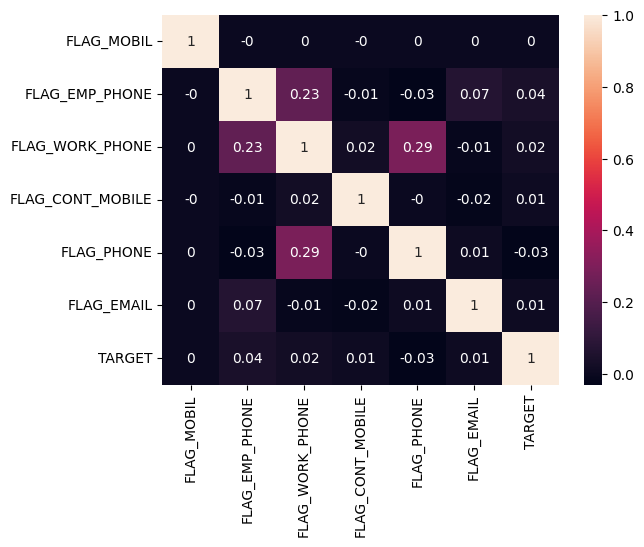

In [ ]:
sns.heatmap(flag_corr_rounded,annot=True)

In [ ]:
#here two columns do not have numerical values so we need to convert them into numerical

In [ ]:
#FLAG_OWN_CAR','FLAG_OWN_REALTY'

In [ ]:
flag_corr_df['FLAG_OWN_CAR']=app_rem['FLAG_OWN_CAR'].replace({'N':0,'Y':1})
flag_corr_df['FLAG_OWN_REALTY']=app_rem['FLAG_OWN_REALTY'].replace({'N':0,'Y':1})

<ipython-input-73-812033f462ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flag_corr_df['FLAG_OWN_CAR']=app_rem['FLAG_OWN_CAR'].replace({'N':0,'Y':1})
<ipython-input-73-812033f462ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flag_corr_df['FLAG_OWN_REALTY']=app_rem['FLAG_OWN_REALTY'].replace({'N':0,'Y':1})


In [ ]:
#now building a heat map on them

In [ ]:
flag_corr_df

In [ ]:
flag_corr_rounded=round(flag_corr_df.corr(),2)

<Axes: >

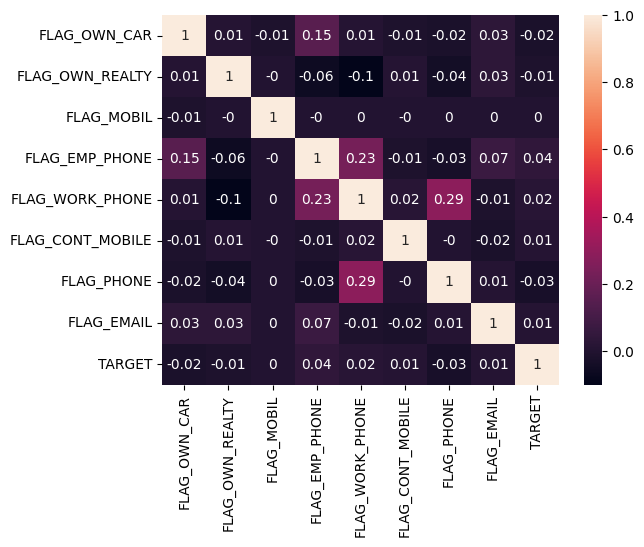

In [ ]:
sns.heatmap(flag_corr_rounded,annot=True)

In [ ]:
#No good correlation with target value so they are not influencing target anyhow...so dropping them off

In [ ]:
rem_flag_col=['FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL']

In [ ]:
app_rem.drop(rem_flag_col,axis=1,inplace=True)

In [ ]:
app_rem.shape

(23282, 65)

In [ ]:
rem_col=['FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [ ]:
app_rem.drop(rem_col,axis=1,inplace=True)

In [ ]:
app_rem.shape

(23282, 45)

In [ ]:
app_rem.info()

In [ ]:
ext_scr=app_rem[['EXT_SOURCE_2','EXT_SOURCE_3','TARGET']]

<Axes: >

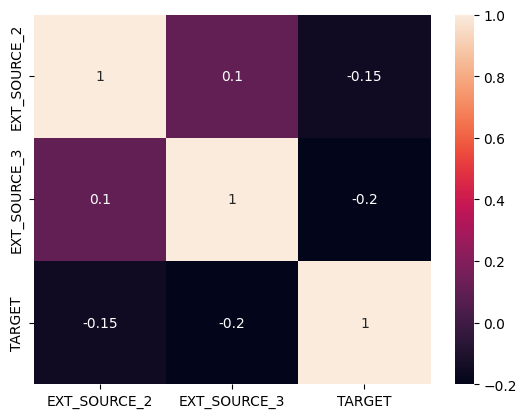

In [ ]:
sns.heatmap(round(ext_scr.corr(),2),annot=True)

In [ ]:
app_rem.drop(['EXT_SOURCE_2','EXT_SOURCE_3'],axis=1,inplace=True)

In [ ]:
app_rem.shape

(23282, 43)

Feature Engineering

In [ ]:
app_rem.isnull().sum().sort_values(ascending=False)/len(app_rem)*100

OCCUPATION_TYPE                31.131346
AMT_REQ_CREDIT_BUREAU_YEAR     13.375140
AMT_REQ_CREDIT_BUREAU_QRT      13.375140
AMT_REQ_CREDIT_BUREAU_MON      13.375140
AMT_REQ_CREDIT_BUREAU_WEEK     13.375140
AMT_REQ_CREDIT_BUREAU_DAY      13.375140
AMT_REQ_CREDIT_BUREAU_HOUR     13.375140
NAME_TYPE_SUITE                 0.420926
DEF_30_CNT_SOCIAL_CIRCLE        0.352203
OBS_30_CNT_SOCIAL_CIRCLE        0.352203
OBS_60_CNT_SOCIAL_CIRCLE        0.352203
DEF_60_CNT_SOCIAL_CIRCLE        0.352203
AMT_GOODS_PRICE                 0.077313
DAYS_LAST_PHONE_CHANGE          0.008590
WEEKDAY_APPR_PROCESS_START      0.004295
ORGANIZATION_TYPE               0.004295
LIVE_CITY_NOT_WORK_CITY         0.004295
REG_CITY_NOT_WORK_CITY          0.004295
REG_CITY_NOT_LIVE_CITY          0.004295
LIVE_REGION_NOT_WORK_REGION     0.004295
REG_REGION_NOT_WORK_REGION      0.004295
REG_REGION_NOT_LIVE_REGION      0.004295
HOUR_APPR_PROCESS_START         0.004295
REGION_RATING_CLIENT            0.004295
REGION_RATING_CL

In [ ]:
app_rem.groupby('CNT_FAM_MEMBERS').size()

CNT_FAM_MEMBERS
1.0      5011
2.0     12104
3.0      4024
4.0      1823
5.0       277
6.0        31
7.0         7
8.0         2
9.0         1
10.0        1
dtype: int64

In [ ]:
mode=app_rem['CNT_FAM_MEMBERS'].mode()

In [ ]:
mode[0]

2.0

In [ ]:
app_rem['CNT_FAM_MEMBERS'].fillna(mode[0],inplace=True)

In [ ]:
app_rem['CNT_FAM_MEMBERS'].isnull().sum()

0

In [ ]:
app_rem.groupby('OCCUPATION_TYPE')['ORGANIZATION_TYPE']

In [ ]:
corr=['OCCUPATION_TYPE','ORGANIZATION_TYPE','NAME_INCOME_TYPE']

In [ ]:
cor=app_rem[corr]

In [ ]:
app_rem['NAME_EDUCATION_TYPE'].unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [ ]:
#as there is no link to other columns,we will fill with mode value

In [ ]:
mode1=app_rem['OCCUPATION_TYPE'].mode()
mode1[0]

'Laborers'

In [ ]:
app_rem['OCCUPATION_TYPE'].fillna(mode1[0],inplace=True)

In [ ]:
app_rem['OCCUPATION_TYPE'].isnull().sum()

0

In [ ]:
app_rem.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                  18
NAME_TYPE_SUITE                  98
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
OCCUPATION_TYPE                   0
CNT_FAM_MEMBERS                   0
REGION_RATING_CLIENT              1
REGION_RATING_CLIENT_W_CITY       1
WEEKDAY_APPR_PROCESS_START        1
HOUR_APPR_PROCESS_START           1
REG_REGION_NOT_LIVE_REGION        1
REG_REGION_NOT_WORK_REGION        1
LIVE_REGION_NOT_WORK_REGION 

In [ ]:
app_rem.groupby(['NAME_TYPE_SUITE']).size()

NAME_TYPE_SUITE
Children             261
Family              3063
Group of people       20
Other_A               52
Other_B              122
Spouse, partner      853
Unaccompanied      18813
dtype: int64

In [ ]:
app_rem['NAME_TYPE_SUITE'].fillna('Unaccompanied',inplace=True)

In [ ]:
app_rem['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(app_rem['AMT_REQ_CREDIT_BUREAU_YEAR'].median(),inplace=True)

In [ ]:
app_rem['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(app_rem['AMT_REQ_CREDIT_BUREAU_QRT'].median(),inplace=True)
app_rem['AMT_REQ_CREDIT_BUREAU_MON'].fillna(app_rem['AMT_REQ_CREDIT_BUREAU_MON'].median(),inplace=True)
app_rem['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(app_rem['AMT_REQ_CREDIT_BUREAU_WEEK'].median(),inplace=True)
app_rem['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(app_rem['AMT_REQ_CREDIT_BUREAU_DAY'].median(),inplace=True)
app_rem['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(app_rem['AMT_REQ_CREDIT_BUREAU_HOUR'].median(),inplace=True)

In [ ]:
app_rem['DEF_30_CNT_SOCIAL_CIRCLE'].unique()

array([ 2.,  0.,  1., nan,  3.,  4.,  5.,  6.])

In [ ]:
app_rem['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(app_rem['DEF_30_CNT_SOCIAL_CIRCLE'].median(),inplace=True)

In [ ]:
app_rem['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(app_rem['OBS_30_CNT_SOCIAL_CIRCLE'].median(),inplace=True)
app_rem['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(app_rem['OBS_60_CNT_SOCIAL_CIRCLE'].median(),inplace=True)
app_rem['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(app_rem['DEF_60_CNT_SOCIAL_CIRCLE'].median(),inplace=True)

In [ ]:
app_rem.isnull().sum().sort_values(ascending=False)/len(app_rem)*100

AMT_GOODS_PRICE                0.077313
DAYS_LAST_PHONE_CHANGE         0.008590
REGION_RATING_CLIENT           0.004295
ORGANIZATION_TYPE              0.004295
HOUR_APPR_PROCESS_START        0.004295
REG_REGION_NOT_LIVE_REGION     0.004295
REG_REGION_NOT_WORK_REGION     0.004295
LIVE_REGION_NOT_WORK_REGION    0.004295
REG_CITY_NOT_LIVE_CITY         0.004295
REG_CITY_NOT_WORK_CITY         0.004295
LIVE_CITY_NOT_WORK_CITY        0.004295
WEEKDAY_APPR_PROCESS_START     0.004295
REGION_RATING_CLIENT_W_CITY    0.004295
OBS_30_CNT_SOCIAL_CIRCLE       0.000000
OBS_60_CNT_SOCIAL_CIRCLE       0.000000
DEF_60_CNT_SOCIAL_CIRCLE       0.000000
AMT_REQ_CREDIT_BUREAU_HOUR     0.000000
AMT_REQ_CREDIT_BUREAU_DAY      0.000000
AMT_REQ_CREDIT_BUREAU_WEEK     0.000000
AMT_REQ_CREDIT_BUREAU_MON      0.000000
AMT_REQ_CREDIT_BUREAU_QRT      0.000000
DEF_30_CNT_SOCIAL_CIRCLE       0.000000
SK_ID_CURR                     0.000000
TARGET                         0.000000
CNT_FAM_MEMBERS                0.000000


Value Modification

In [ ]:
app_rem['AMT_GOODS_PRICE'].agg(['median','max','min'])

median     450000.0
max       4050000.0
min         45000.0
Name: AMT_GOODS_PRICE, dtype: float64

<Axes: xlabel='AMT_GOODS_PRICE'>

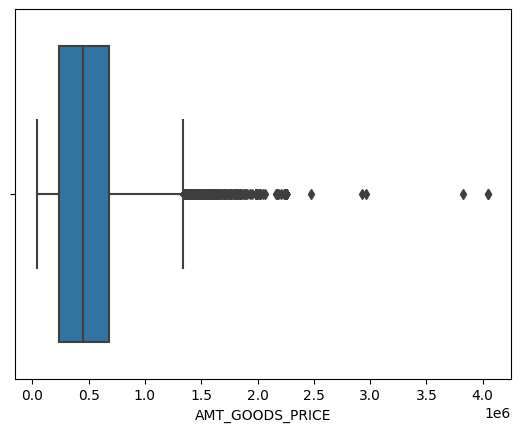

In [ ]:
sns.boxplot(data=app_rem,x=app_rem['AMT_GOODS_PRICE'])

In [ ]:
app_rem['AMT_GOODS_PRICE'].fillna(app_rem['AMT_GOODS_PRICE'].median(),inplace=True)

In [ ]:
app_rem['DAYS_ID_PUBLISH'].head()

0   -2120
1    -291
2   -2531
3   -2437
4   -3458
Name: DAYS_ID_PUBLISH, dtype: int64

In [ ]:
#days are in negative values,so we need to modify values

In [ ]:
days_cols=[]
for col in app_rem.columns:
  if col.startswith('DAYS_'):
    days_cols.append(col)
days_cols

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [ ]:
for i in days_cols:
  app_rem[i]=abs(app_rem[i])

In [ ]:
app_rem['DAYS_BIRTH'].head()  #converted to positive

0     9461
1    16765
2    19046
3    19005
4    19932
Name: DAYS_BIRTH, dtype: int64

In [ ]:
app_rem.nunique().sort_values(ascending=False)

SK_ID_CURR                     23282
DAYS_BIRTH                     12352
DAYS_REGISTRATION              10314
AMT_ANNUITY                     6522
DAYS_EMPLOYED                   6204
DAYS_ID_PUBLISH                 5400
DAYS_LAST_PHONE_CHANGE          3151
AMT_CREDIT                      2619
AMT_INCOME_TOTAL                 519
AMT_GOODS_PRICE                  425
REGION_POPULATION_RELATIVE        80
ORGANIZATION_TYPE                 58
OBS_60_CNT_SOCIAL_CIRCLE          24
OBS_30_CNT_SOCIAL_CIRCLE          24
HOUR_APPR_PROCESS_START           24
AMT_REQ_CREDIT_BUREAU_MON         19
OCCUPATION_TYPE                   18
AMT_REQ_CREDIT_BUREAU_YEAR        16
CNT_FAM_MEMBERS                   10
AMT_REQ_CREDIT_BUREAU_QRT          9
CNT_CHILDREN                       9
NAME_TYPE_SUITE                    7
WEEKDAY_APPR_PROCESS_START         7
DEF_30_CNT_SOCIAL_CIRCLE           7
NAME_HOUSING_TYPE                  6
AMT_REQ_CREDIT_BUREAU_WEEK         6
AMT_REQ_CREDIT_BUREAU_DAY          6
D

BINNING


In [ ]:
bin_cols=['DAYS_BIRTH',
'DAYS_REGISTRATION'
'AMT_ANNUITY',
'DAYS_EMPLOYED',
'DAYS_ID_PUBLISH',
'AMT_CREDIT',
'DAYS_LAST_PHONE_CHANGE',
'AMT_INCOME_TOTAL',
'AMT_GOODS_PRICE']

<Axes: xlabel='AMT_GOODS_PRICE'>

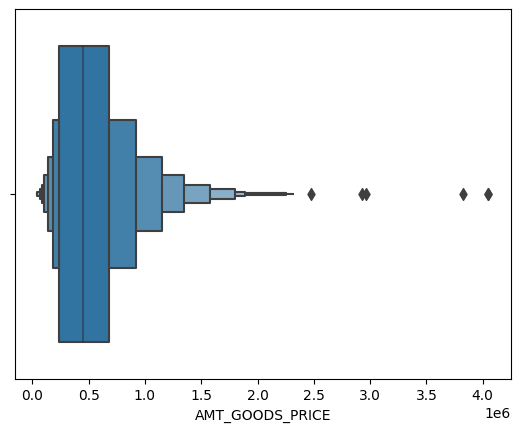

In [ ]:
sns.boxenplot(data=app_rem,x='AMT_GOODS_PRICE')

In [ ]:
app_rem['AMT_GOODS_PRICE'].agg(['min','max','median'])

min         45000.0
max       4050000.0
median     450000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [ ]:
app_rem['AMT_GOODS_PRICE'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10     180000.0
0.20     225000.0
0.30     270000.0
0.40     382500.0
0.50     450000.0
0.60     535500.0
0.70     675000.0
0.80     823500.0
0.90    1084500.0
0.99    1800000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [ ]:
bins=[0,100000,200000,300000,400000,500000,600000,700000,800000,900000,4050000]
ranges=['0-100k','100k-200k','200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','above 900k']

In [ ]:
app_rem['AMT_GOODS_PRICE_RANGE']=pd.cut(app_rem['AMT_GOODS_PRICE'],bins,labels=ranges)

In [ ]:
app_rem.groupby(['AMT_GOODS_PRICE_RANGE']).size()

AMT_GOODS_PRICE_RANGE
0-100k         673
100k-200k     2496
200k-300k     4682
300k-400k     1602
400k-500k     4342
500k-600k      991
600k-700k     3021
700k-800k      618
800k-900k     1673
above 900k    3184
dtype: int64

In [ ]:
app_rem['AMT_INCOME_TOTAL'].agg(['min','max','median'])

min           25650.0
max       117000000.0
median       146475.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [ ]:
app_rem['AMT_INCOME_TOTAL'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10     81000.0
0.20     99000.0
0.30    112500.0
0.40    135000.0
0.50    146475.0
0.60    162000.0
0.70    184500.0
0.80    225000.0
0.90    270000.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [ ]:
bins=[0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000,117000000]
ranges=['0-50k','50k-100k','100k-150k','150k-200k','200k-250k','250k-300k','300k-350k','350k-400k','400k-450k','450k-500k','above 500k']

In [ ]:
app_rem['AMT_INCOME_TOTAL_RANGE']=pd.cut(app_rem['AMT_INCOME_TOTAL'],bins,labels=ranges)

In [ ]:
app_rem.groupby(['AMT_INCOME_TOTAL_RANGE']).size()

AMT_INCOME_TOTAL_RANGE
0-50k          373
50k-100k      4530
100k-150k     6856
150k-200k     4828
200k-250k     3646
250k-300k     1314
300k-350k      666
350k-400k      460
400k-450k      363
450k-500k       35
above 500k     211
dtype: int64

In [ ]:
app_rem['AMT_CREDIT'].agg(['min','max','median'])

min         45000.0
max       4050000.0
median     516069.0
Name: AMT_CREDIT, dtype: float64

In [ ]:
app_rem['AMT_CREDIT'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10     180000.000
0.20     254700.000
0.30     312768.000
0.40     438084.000
0.50     516069.000
0.60     607845.600
0.70     755190.000
0.80     900000.000
0.90    1132573.500
0.99    1823477.625
Name: AMT_CREDIT, dtype: float64

In [ ]:
bins=[0,100000,200000,300000,400000,500000,600000,700000,800000,900000,4050000]
ranges=['0-100k','100k-200k','200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','above 900k']

In [ ]:
app_rem['AMT_CREDI_RANGE']=pd.cut(app_rem['AMT_CREDIT'],bins,labels=ranges)

In [ ]:
app_rem['AMT_CREDI_RANGE'].head()

0     400k-500k
1    above 900k
2     100k-200k
3     300k-400k
4     500k-600k
Name: AMT_CREDI_RANGE, dtype: category
Categories (10, object): ['0-100k' < '100k-200k' < '200k-300k' < '300k-400k' ... '600k-700k' <
                          '700k-800k' < '800k-900k' < 'above 900k']

In [ ]:
app_rem['AMT_ANNUITY'].agg(['min','max','median'])

min         2052.00
max       258025.50
median     24986.25
Name: AMT_ANNUITY, dtype: float64

In [ ]:
app_rem['AMT_ANNUITY'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10    10966.50
0.20    14638.50
0.30    18211.50
0.40    21906.00
0.50    24986.25
0.60    28179.00
0.70    32067.00
0.80    37638.00
0.90    46042.65
0.99    69781.50
Name: AMT_ANNUITY, dtype: float64

In [ ]:
bins=[0,10000,20000,30000,40000,50000,60000,70000,258025]
ranges=['0-10k','10k-20k','20k-30k','30k-40k','40k-50k','50k-60k','60k-70k','above 70k']

In [ ]:
app_rem['AMT_ANNUITY_RANGE']=pd.cut(app_rem['AMT_ANNUITY'],bins,labels=ranges)

In [ ]:
app_rem.groupby(['AMT_ANNUITY_RANGE']).size()

AMT_ANNUITY_RANGE
0-10k        1799
10k-20k      6207
20k-30k      7011
30k-40k      4449
40k-50k      2220
50k-60k       972
60k-70k       396
above 70k     227
dtype: int64

In [ ]:
app_rem['DAYS_EMPLOYED'].agg(['min','max','median'])

min            4.0
max       365243.0
median      2209.5
Name: DAYS_EMPLOYED, dtype: float64

In [ ]:
app_rem['DAYS_EMPLOYED'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10       385.0
0.20       742.0
0.30      1140.0
0.40      1598.0
0.50      2209.5
0.60      3032.6
0.70      4434.0
0.80      8929.4
0.90    365243.0
0.99    365243.0
Name: DAYS_EMPLOYED, dtype: float64

In [ ]:
bins=[0,1000,2000,3000,4000,5000,6000,7000,8000,365243]
ranges=['0-1k','1k-2k','2k-3k','3k-4k','4k-5k','5k-6k','6k-7k','7K-8K','above 8k']

In [ ]:
app_rem['DAYS_EMPLOYED_RANGE']=pd.cut(app_rem['DAYS_EMPLOYED'],bins,labels=ranges)

In [ ]:
app_rem.groupby(['DAYS_EMPLOYED_RANGE']).size()

DAYS_EMPLOYED_RANGE
0-1k        6198
1k-2k       4782
2k-3k       2904
3k-4k       1886
4k-5k       1083
5k-6k        756
6k-7k        426
7K-8K        358
above 8k    4889
dtype: int64

In [ ]:
app_rem['DAYS_BIRTH'].agg(['min','max','median'])

min        7680.0
max       25182.0
median    15748.5
Name: DAYS_BIRTH, dtype: float64

In [ ]:
app_rem['DAYS_BIRTH'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10    10284.00
0.20    11695.40
0.30    13080.30
0.40    14397.20
0.50    15748.50
0.60    17184.60
0.70    18826.00
0.80    20385.80
0.90    22174.00
0.99    24401.95
Name: DAYS_BIRTH, dtype: float64

In [ ]:
bins=[0,10000,14000,18000,22000,26000,30000]
ranges=['0-10k','10k-14k','14k-18k','18K-22k','22K-26K','26K-30K']

In [ ]:
app_rem['DAYS_BIRTH_RANGE']=pd.cut(app_rem['DAYS_BIRTH'],bins,labels=ranges)

In [ ]:
app_rem.groupby(['DAYS_BIRTH_RANGE']).size()

DAYS_BIRTH_RANGE
0-10k      1806
10k-14k    6756
14k-18k    6603
18K-22k    5583
22K-26K    2534
26K-30K       0
dtype: int64

In [ ]:
app_rem.dtypes.value_counts()

float64     27
object      10
int64        6
category     2
category     1
category     1
category     1
category     1
dtype: int64

In [ ]:
obj_cols=app_rem.select_dtypes(include=['object']).head().columns  #categorical

In [ ]:
obj_cols

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Working'),
  Text(1, 0, 'State servant'),
  Text(2, 0, 'Commercial associate'),
  Text(3, 0, 'Pensioner'),
  Text(4, 0, 'Unemployed'),
  Text(5, 0, 'Student')])

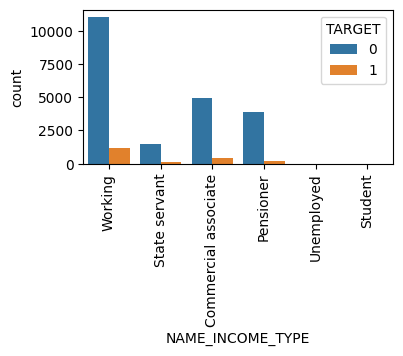

In [ ]:
plt.figure(figsize=(4,2))
# sns.countplot(data=app_rem,x='NAME_CONTRACT_TYPE',hue='TARGET')

sns.countplot(data=app_rem,x='NAME_INCOME_TYPE',hue='TARGET')
plt.xticks(rotation=90)

<Axes: xlabel='CODE_GENDER', ylabel='count'>

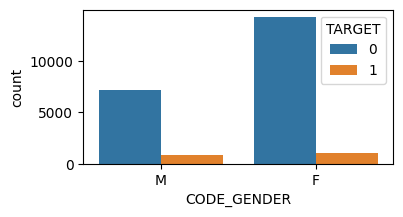

In [ ]:
plt.figure(figsize=(4,2))
sns.countplot(data=app_rem,x='CODE_GENDER',hue='TARGET')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Working'),
  Text(1, 0, 'State servant'),
  Text(2, 0, 'Commercial associate'),
  Text(3, 0, 'Pensioner'),
  Text(4, 0, 'Unemployed'),
  Text(5, 0, 'Student')])

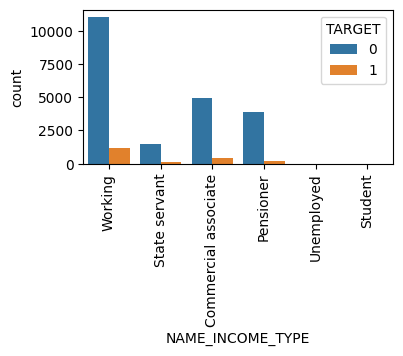

In [ ]:
plt.figure(figsize=(4,2))
sns.countplot(data=app_rem,x='NAME_INCOME_TYPE',hue='TARGET')
plt.xticks(rotation=90)

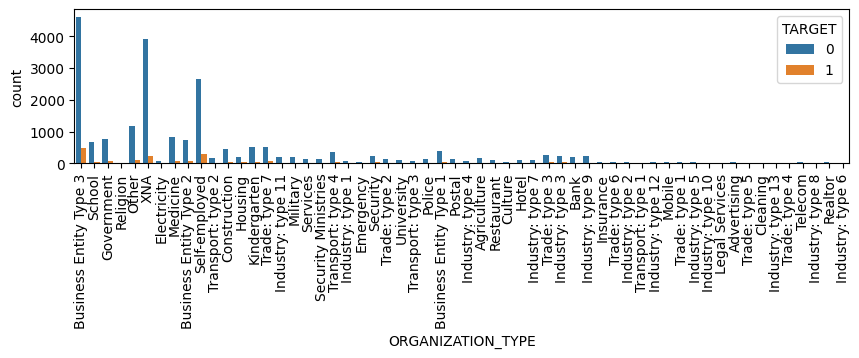

In [ ]:
plt.figure(figsize=(10,2))
sns.countplot(data=app_rem,x='ORGANIZATION_TYPE',hue='TARGET')
plt.xticks(rotation=90)
plt.show()

In [ ]:
num_cols=app_rem.select_dtypes(include=['float64','int64']).head().columns

In [ ]:
len(num_cols)

33

In [ ]:
num_var_cols=app_rem.select_dtypes(include=['float64','int64','category']).head().columns

In [ ]:
len(num_var_cols)

39

In [ ]:
num_data=app_rem[num_cols]

In [ ]:
defaulters=num_data[num_data['TARGET']==1]

In [ ]:
defaulters.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,...,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,1,0,112500.0,979992.0,27076.5,702000.0,0.018029,18724,2628,...,1.0,10.0,0.0,161.0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,1,0,202500.0,1193580.0,35028.0,855000.0,0.025164,17482,1262,...,0.0,0.0,0.0,1075.0,0.0,0.0,0.0,2.0,0.0,4.0
42,100049,1,0,135000.0,288873.0,16258.5,238500.0,0.007305,13384,3597,...,0.0,1.0,0.0,1480.0,0.0,0.0,0.0,0.0,0.0,2.0
81,100096,1,0,81000.0,252000.0,14593.5,252000.0,0.028663,24794,365243,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#TOP 10 variables which are highly correlated to each other

In [ ]:
defaulters[['SK_ID_CURR','CNT_CHILDREN','AMT_INCOME_TOTAL']].corr()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL
SK_ID_CURR,1.000000,-0.012354,0.003588
CNT_CHILDREN,-0.012354,1.000000,0.014897
AMT_INCOME_TOTAL,0.003588,0.014897,1.000000


In [ ]:
def_corr=defaulters.corr()

In [ ]:
non_df=num_data[num_data['TARGET']==0]

In [ ]:
non_df.shape

(21424, 33)